# Tutorial 3 - PCA on synthetic data

In [2]:
from __future__ import division

%matplotlib inline

from IPython.display import display 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.stats
from sklearn.decomposition import PCA
import sys

sys.path.append('../src/')
import utils

mpl.rcParams['legend.fontsize'] = 'small'

In [3]:
noise_on = True
k = 2 * np.pi / 100
omega = 2 * np.pi / 50
x = np.arange(1, 101, dtype=float)
t = np.arange(1, 201, dtype=float)
xbig = np.tile(x.reshape(1, len(x)), (200, 1))
tbig = np.tile(t.reshape(len(t), 1), (1, 100))
y = np.sin(k * xbig - omega * tbig)
if noise_on:
    noise = sio.loadmat('noise.mat')['noise']
    y = y + noise

In [4]:
# Load all the variables from running the Matlab script, for comparison
nms = ['a', 'D', 'eigval', 'invV', 'mean_y', 'noise', 's', 'V',
       'variance', 'y', 'y_rec', 'yn']
mat = {}
for nm in nms:
    mat[nm] = sio.loadmat('variables/%s.mat' % nm)[nm]
mat['eigvec'] = mat['V']

In [5]:
def matrix_check(y1, y2, i=None, j=None):
    display(np.sum(y1))
    display(np.sum(y2))
    display(np.sum(y1 - y2))
    if i is not None:
        plt.plot(y1[i])
        plt.plot(y2[i], 'r--')
    if j is not None:
        plt.figure()
        plt.plot(y1[:, j])
        plt.plot(y2[:, j], 'r--')

-18.721231053191406

-18.721231053191353

1.429412144204889e-15

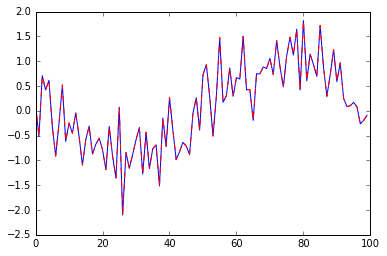

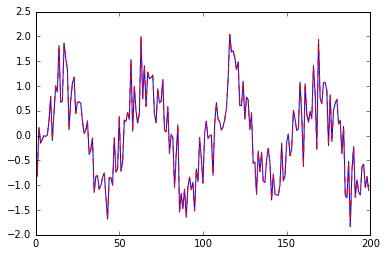

In [6]:
matrix_check(y, mat['y'], i=25, j=60)

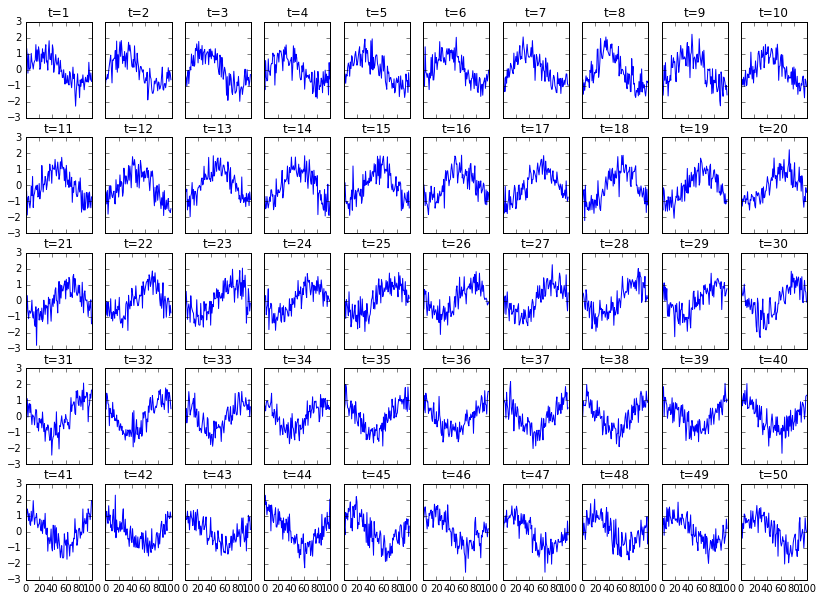

In [7]:
fig, axes = plt.subplots(5, 10, figsize=(14, 10), sharex='all', sharey='all')
axlist = axes.ravel()
for i, ax in enumerate(axlist):
    ax.plot(y[i])
    ax.set_title('t=%.0f' % t[i])

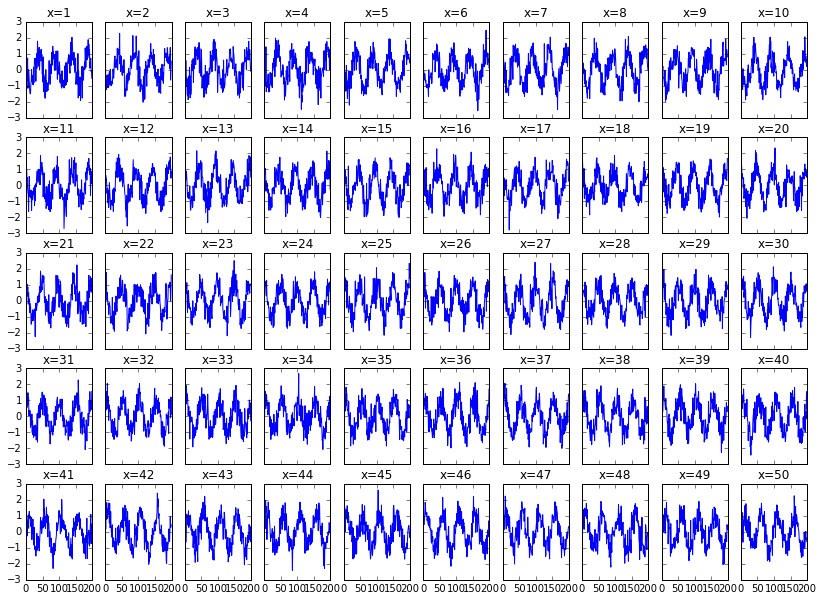

In [8]:
fig, axes = plt.subplots(5, 10, figsize=(14, 10), sharex='all', sharey='all')
axlist = axes.ravel()
for i, ax in enumerate(axlist):
    ax.plot(y[:, i])
    ax.set_title('x=%.0f' % x[i])

In [9]:
# Subtract the mean (along columns) and transpose
mean_y = np.mean(y.T, axis=1)
yn = (y - mean_y).T 

-0.093606155265955962

-0.09360615526595599

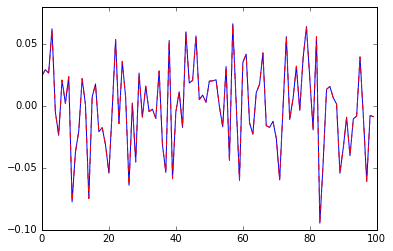

In [10]:
display(np.sum(mean_y))
display(np.sum(mat['mean_y']))
plt.plot(mean_y)
plt.plot(mat['mean_y'], 'r--')

-2.1671553440683056e-13

-2.1671553440683056e-13

-1.0778704317981891e-14

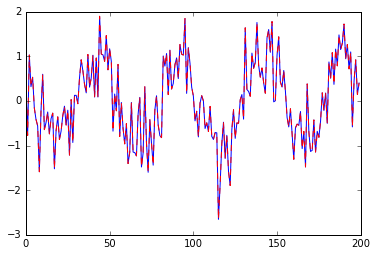

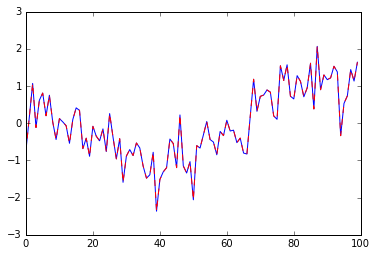

In [11]:
matrix_check(yn, mat['yn'], i=10, j=30)

In [12]:
# Compute the covariance matrix
s = np.cov(yn)

22.276492137837096

22.276492137837074

7.0774007314422516e-15

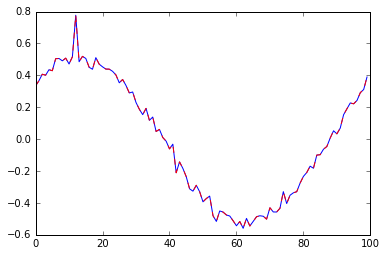

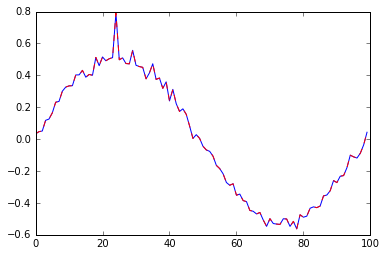

In [13]:
matrix_check(s, mat['s'], i=12, j=24)

In [14]:
# Compute eigenvalues and eigenvectors and sort descending
eigval, eigvec = np.linalg.eig(s)
idx = np.argsort(eigval)
idx = idx[::-1]    
eigval = eigval[idx]
eigvec = eigvec[:, idx]

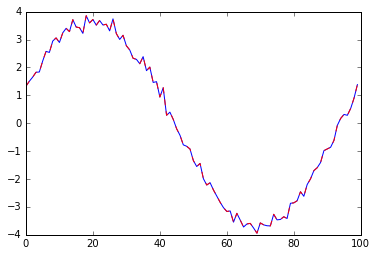

In [15]:
# Sanity check of eigenvectors
ind = 0
var = np.dot(s, eigvec[:, ind])
plt.plot(var)
plt.plot(eigval[ind] * eigvec[:, ind], 'r--')

array([ 26.10447661,  25.34694254,   0.68143028,   0.64182128,   0.61937629])

array([ 26.10447661,  25.34694254,   0.68143028,   0.64182128,   0.61937629])

75.355558288727536

75.355558288727494

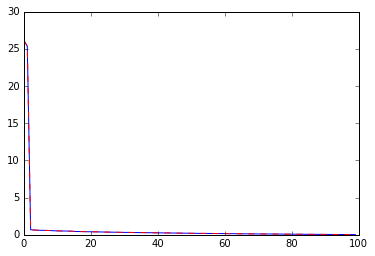

In [16]:
display(eigval[:5])
display(mat['eigval'][:5].ravel())
display(np.sum(eigval))
display(np.sum(mat['eigval']))
plt.plot(eigval)
plt.plot(mat['eigval'], 'r--')

In [17]:
# Fraction of variance explained by each mode
variance = eigval / eigval.sum()

array([ 0.3464174 ,  0.3363646 ,  0.00904287,  0.00851724,  0.00821938,
        0.00803539,  0.00788257,  0.00773178,  0.00754445,  0.00714768])

array([ 0.3464174 ,  0.3363646 ,  0.00904287,  0.00851724,  0.00821938,
        0.00803539,  0.00788257,  0.00773178,  0.00754445,  0.00714768])

1.4381941818020216e-16

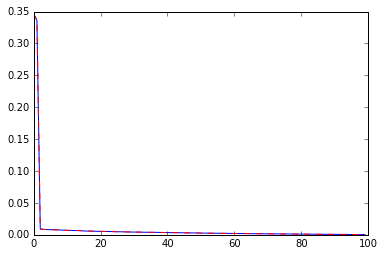

In [18]:
display(variance[:10])
display(mat['variance'][:10].ravel())
display(np.sum(variance - mat['variance'].ravel()))
plt.plot(variance)
plt.plot(mat['variance'], 'r--')

-6.2138475824036208

-3.0902943613894847

-3.123553221014137

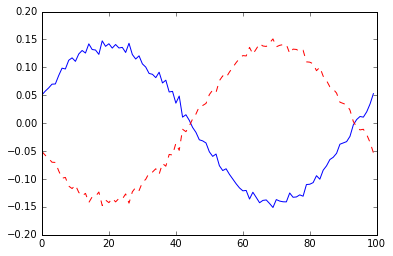

In [19]:
matrix_check(eigvec, mat['eigvec'], i=None, j=0)

In [20]:
# Truncate at kmax
kmax = 3
eigval = eigval[:kmax]
eigvec = eigvec[:, :kmax]

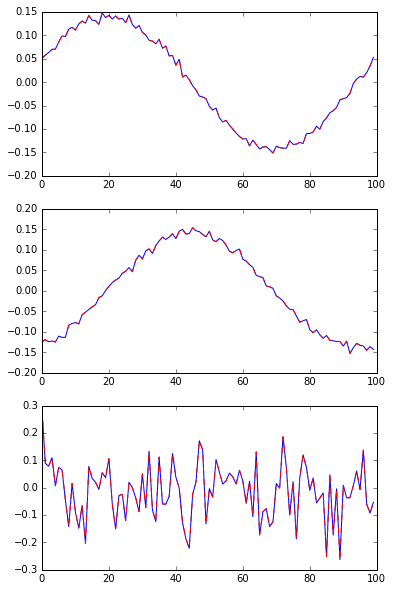

In [21]:
alphas = [-1.0, 1.0, -1.0]
plt.figure(figsize=(6, 10))
for j, alpha in enumerate(alphas):
    plt.subplot(3, 1, j + 1)
    plt.plot(eigvec[:, j])
    plt.plot(alpha * mat['eigvec'][:, j], 'r--')

In [22]:
# Compute principal component scores
a = np.dot(eigvec.T, yn)

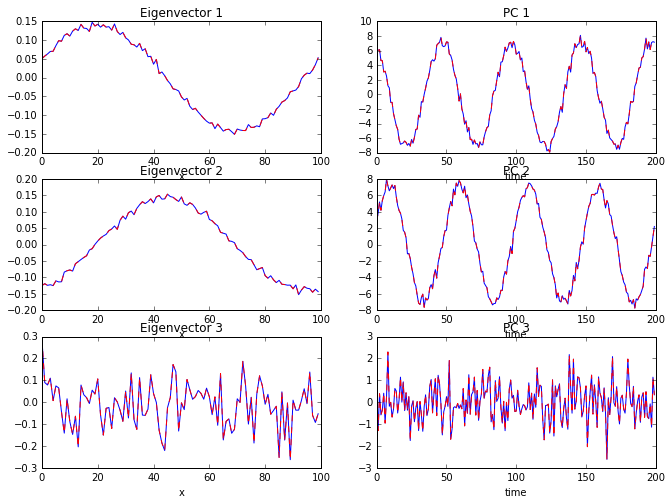

In [23]:
# Plot first three eigenvectors and principal components
plt.figure(figsize=(11, 8))
nr, nc = 3, 2
iplot = 1
for i, alpha in enumerate(alphas):
    plt.subplot(nr, nc, iplot)
    plt.plot(eigvec[:, i])
    plt.plot(alpha * mat['eigvec'][:, i], 'r--')
    plt.xlabel('x')
    plt.title('Eigenvector %d' % (i + 1))
    iplot += 1
    plt.subplot(nr, nc, iplot)
    plt.plot(a[i])
    plt.plot(alpha * mat['a'][i], 'r--')
    plt.xlabel('time')
    plt.title('PC %d' % (i + 1))
    iplot += 1
    

5.3290705182007514e-15

-2.9309887850104133e-14

-7.1054273576010019e-15

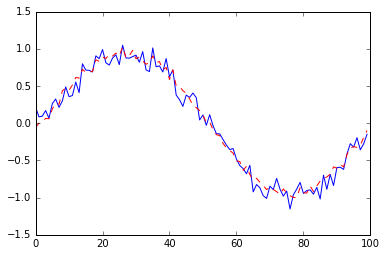

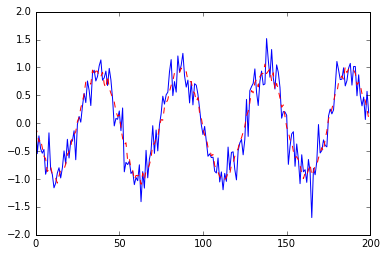

In [24]:
# First kmax modes
y_rec = np.dot(a.T, eigvec.T)
matrix_check(y_rec, mat['y_rec'], i=0, j=0)

-7.1054273576010019e-15

-2.9309887850104133e-14

2.0728454759935677e-15

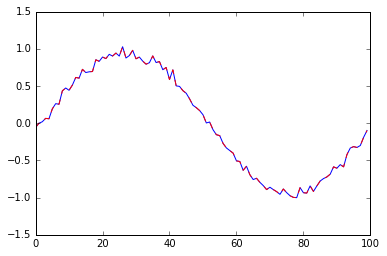

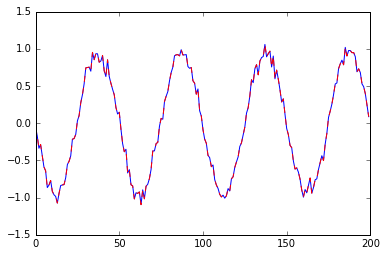

In [25]:
# First two modes only
y_rec = np.dot(a[:2].T, eigvec[:, :2].T)
matrix_check(y_rec, mat['y_rec'], i=0, j=0)

### Put all the steps together into a function

For my sanity, I've changed the order of dimensions in the output of utils.princomp() so that it is consistent with sklearn.decomposition.PCA() and also so that it is consistent with the input data, i.e. input data is n x m, eigenvectors are k x m, and principal components are n x k

In [27]:
kmax = 3
pca = utils.princomp(y, kmax=kmax)

In [28]:
for nm, var in pca.items():
    print(nm, var.shape)

('eigval', (3L,))
('varfrac', (3L,))
('y_rec', (200L, 100L))
('scores', (200L, 3L))
('y_orig', (200L, 100L))
('eigvec', (3L, 100L))


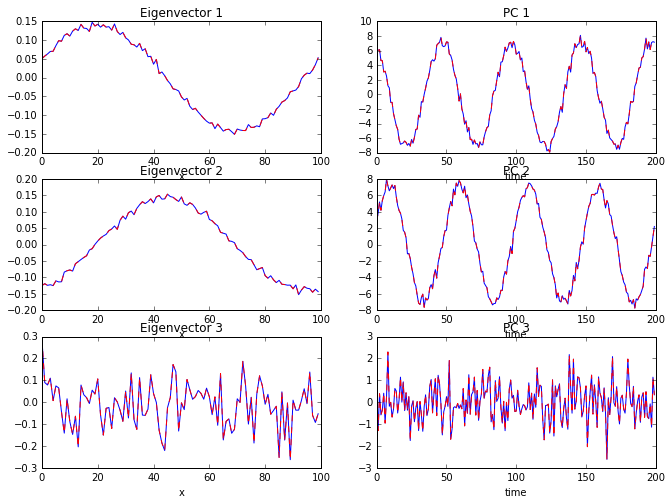

In [30]:
# Plot first three eigenvectors and principal components
plt.figure(figsize=(11, 8))
nr, nc = 3, 2
iplot = 1
for i, alpha in enumerate(alphas):
    plt.subplot(nr, nc, iplot)
    plt.plot(pca['eigvec'][i])
    plt.plot(alpha * mat['eigvec'][:, i], 'r--')
    plt.xlabel('x')
    plt.title('Eigenvector %d' % (i + 1))
    iplot += 1
    plt.subplot(nr, nc, iplot)
    plt.plot(pca['scores'][:, i])
    plt.plot(alpha * mat['a'][i], 'r--')
    plt.xlabel('time')
    plt.title('PC %d' % (i + 1))
    iplot += 1

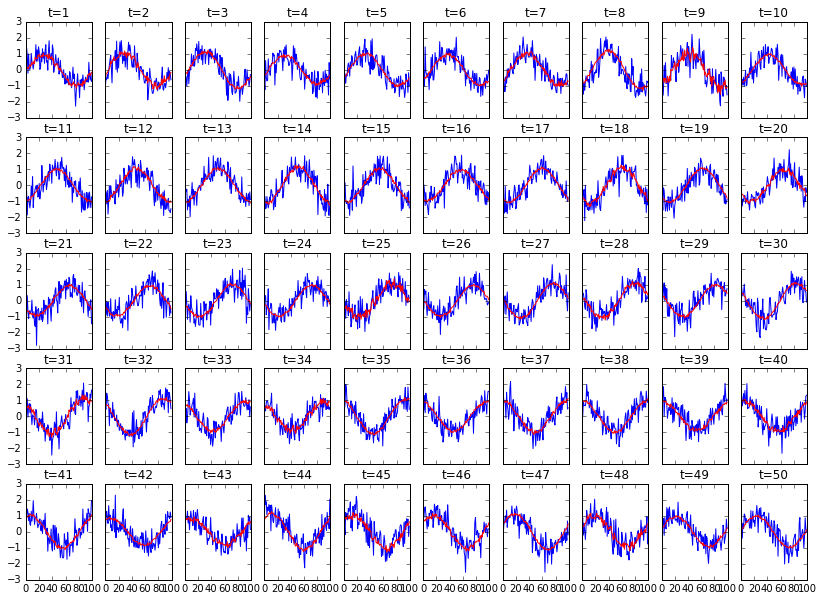

In [31]:
# Plot original y's and reconstructed y's
fig, axes = plt.subplots(5, 10, figsize=(14, 10), sharex='all', sharey='all')
axlist = axes.ravel()
for i, ax in enumerate(axlist):
    ax.plot(y[i])
    ax.plot(pca['y_rec'][i], 'r')
    ax.set_title('t=%.0f' % t[i])

In [32]:
pca['varfrac'].sum()

0.69182487159480377

### Compare with sklearn PCA 

In [33]:
pca2 = PCA(n_components=kmax)
pca2.fit(y)
eigvec2 = pca2.components_
eigvec2 = eigvec2.T
variance2 = pca2.explained_variance_ratio_
eigval2 = pca2.explained_variance_

mean_y = np.mean(y.T, axis=1)
yn = (y - mean_y).T
a2 = np.dot(eigvec2.T, yn)

y_rec2 = pca2.inverse_transform(a2.T)

In [34]:
display(pca['eigval'])
display(eigval2)

array([ 26.10447661,  25.34694254,   0.68143028])

array([ 25.97395423,  25.22020783,   0.67802313])

In [35]:
eigvec2.shape

(100L, 3L)

In [36]:
eigvec.shape

(100L, 3L)

In [37]:
display(variance2)
display(pca['varfrac'])

array([ 0.3464174 ,  0.3363646 ,  0.00904287])

array([ 0.3464174 ,  0.3363646 ,  0.00904287])

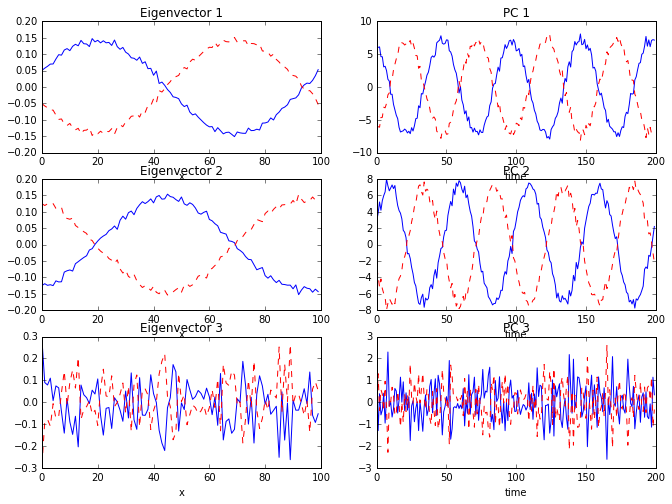

In [38]:
# Plot first three eigenvectors and principal components
plt.figure(figsize=(11, 8))
nr, nc = 3, 2
iplot = 1
for i, alpha in enumerate(alphas):
    plt.subplot(nr, nc, iplot)
    plt.plot(pca['eigvec'][i])
    plt.plot(eigvec2[:, i], 'r--')
    plt.xlabel('x')
    plt.title('Eigenvector %d' % (i + 1))
    iplot += 1
    plt.subplot(nr, nc, iplot)
    plt.plot(pca['scores'][:, i])
    plt.plot(a2[i], 'r--')
    plt.xlabel('time')
    plt.title('PC %d' % (i + 1))
    iplot += 1

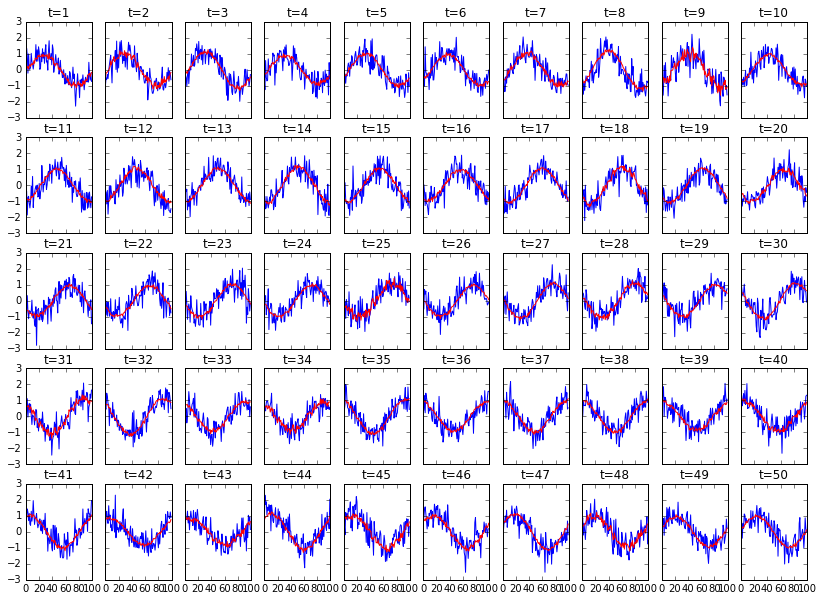

In [39]:
# Plot original y's and reconstructed y's
fig, axes = plt.subplots(5, 10, figsize=(14, 10), sharex='all', sharey='all')
axlist = axes.ravel()
for i, ax in enumerate(axlist):
    ax.plot(y[i])
    ax.plot(y_rec2[i], 'r')
    ax.set_title('t=%.0f' % t[i])

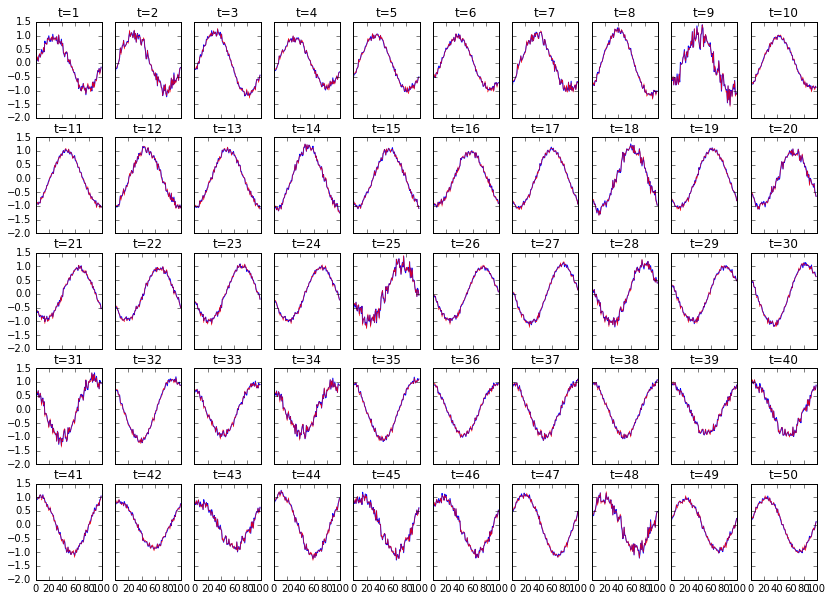

In [40]:
# Compare reconstructed y's between the two functions
fig, axes = plt.subplots(5, 10, figsize=(14, 10), sharex='all', sharey='all')
axlist = axes.ravel()
for i, ax in enumerate(axlist):
    ax.plot(pca['y_rec'][i])
    ax.plot(y_rec2[i], 'r', linewidth=0.5)
    ax.set_title('t=%.0f' % t[i])

### Check that my PCA() wrapper function works

In [42]:
pca3 = utils.pca_skl(y, kmax=kmax)
for nm, var in pca3.items():
    print(nm, var.shape)

('eigval', (3L,))
('varfrac', (3L,))
('y_rec', (200L, 100L))
('scores', (200L, 3L))
('y_orig', (200L, 100L))
('eigvec', (3L, 100L))


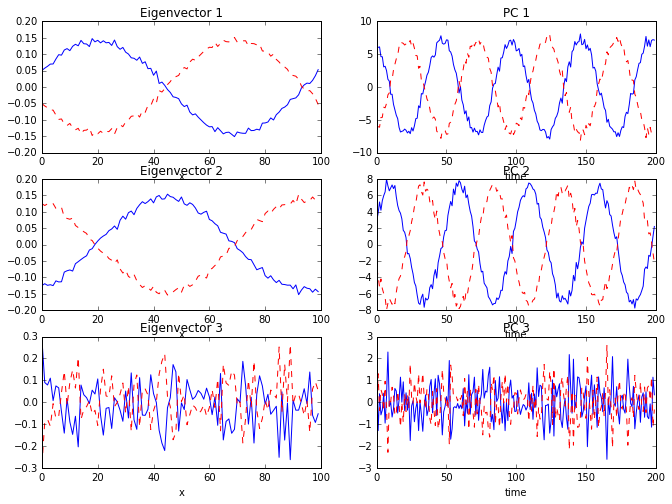

In [43]:
# Plot first three eigenvectors and principal components
plt.figure(figsize=(11, 8))
nr, nc = 3, 2
iplot = 1
for i, alpha in enumerate(alphas):
    plt.subplot(nr, nc, iplot)
    plt.plot(pca['eigvec'][i])
    plt.plot(pca3['eigvec'][i], 'r--')
    plt.xlabel('x')
    plt.title('Eigenvector %d' % (i + 1))
    iplot += 1
    plt.subplot(nr, nc, iplot)
    plt.plot(pca['scores'][:, i])
    plt.plot(pca3['scores'][:, i], 'r--')
    plt.xlabel('time')
    plt.title('PC %d' % (i + 1))
    iplot += 1

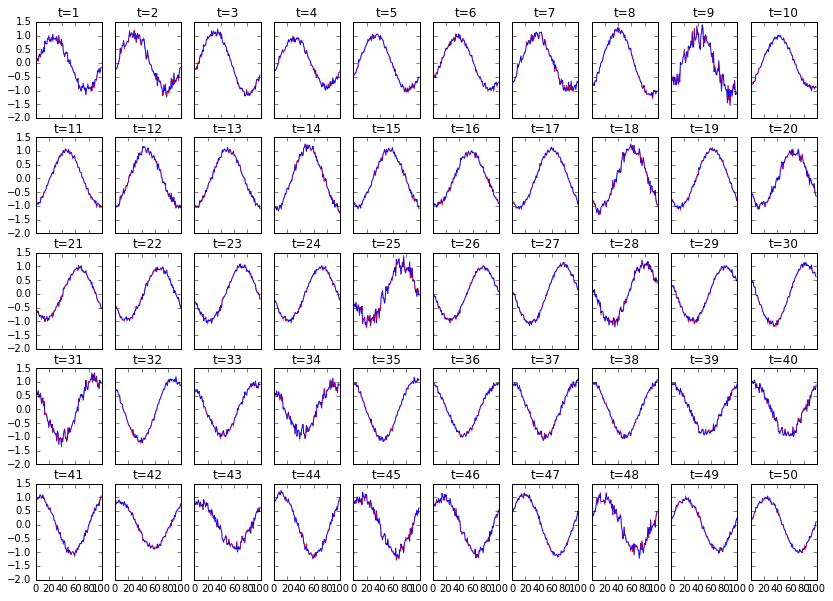

In [45]:
# Compare reconstructed y's between the two functions
fig, axes = plt.subplots(5, 10, figsize=(14, 10), sharex='all', sharey='all')
axlist = axes.ravel()
for i, ax in enumerate(axlist):
    ax.plot(pca['y_rec'][i])
    ax.plot(pca3['y_rec'][i], 'r--', linewidth=0.5)
    ax.set_title('t=%.0f' % t[i])

In [46]:
display(pca3['varfrac'])
display(pca['varfrac'])

array([ 0.3464174 ,  0.3363646 ,  0.00904287])

array([ 0.3464174 ,  0.3363646 ,  0.00904287])